In this homework we are going to work on the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. The data has been split for you into training, validation, and test sets.

# Question 0


**WARNING**: This homework use some legacy code that is not supported by the newest version of tensorflow (currently 2.17.1) that is native to colab. Please run the following cell and restart the session to continue.

In [ ]:
!pip3 install tensorflow==2.15.0

In [ ]:
from tensorflow.keras.datasets import cifar10
(train_set_images, train_set_labels), (test_set_images, test_set_labels) = cifar10.load_data()
validation_set_images = train_set_images[:10000]
validation_set_labels = train_set_labels[:10000]
train_set_images = train_set_images[10000:]
train_set_labels = train_set_labels[10000:]

# Question 1
(20 points)

**Q1 NN from scratch** (20 points):
Write the forward path of a 4-layer fully connected neural network (sigmoid as activation function) with ONLY numpy following the instruction. High level machine learning APIs (eg. Pytorch, Keras, sklearn) are NOT allowed for this question.

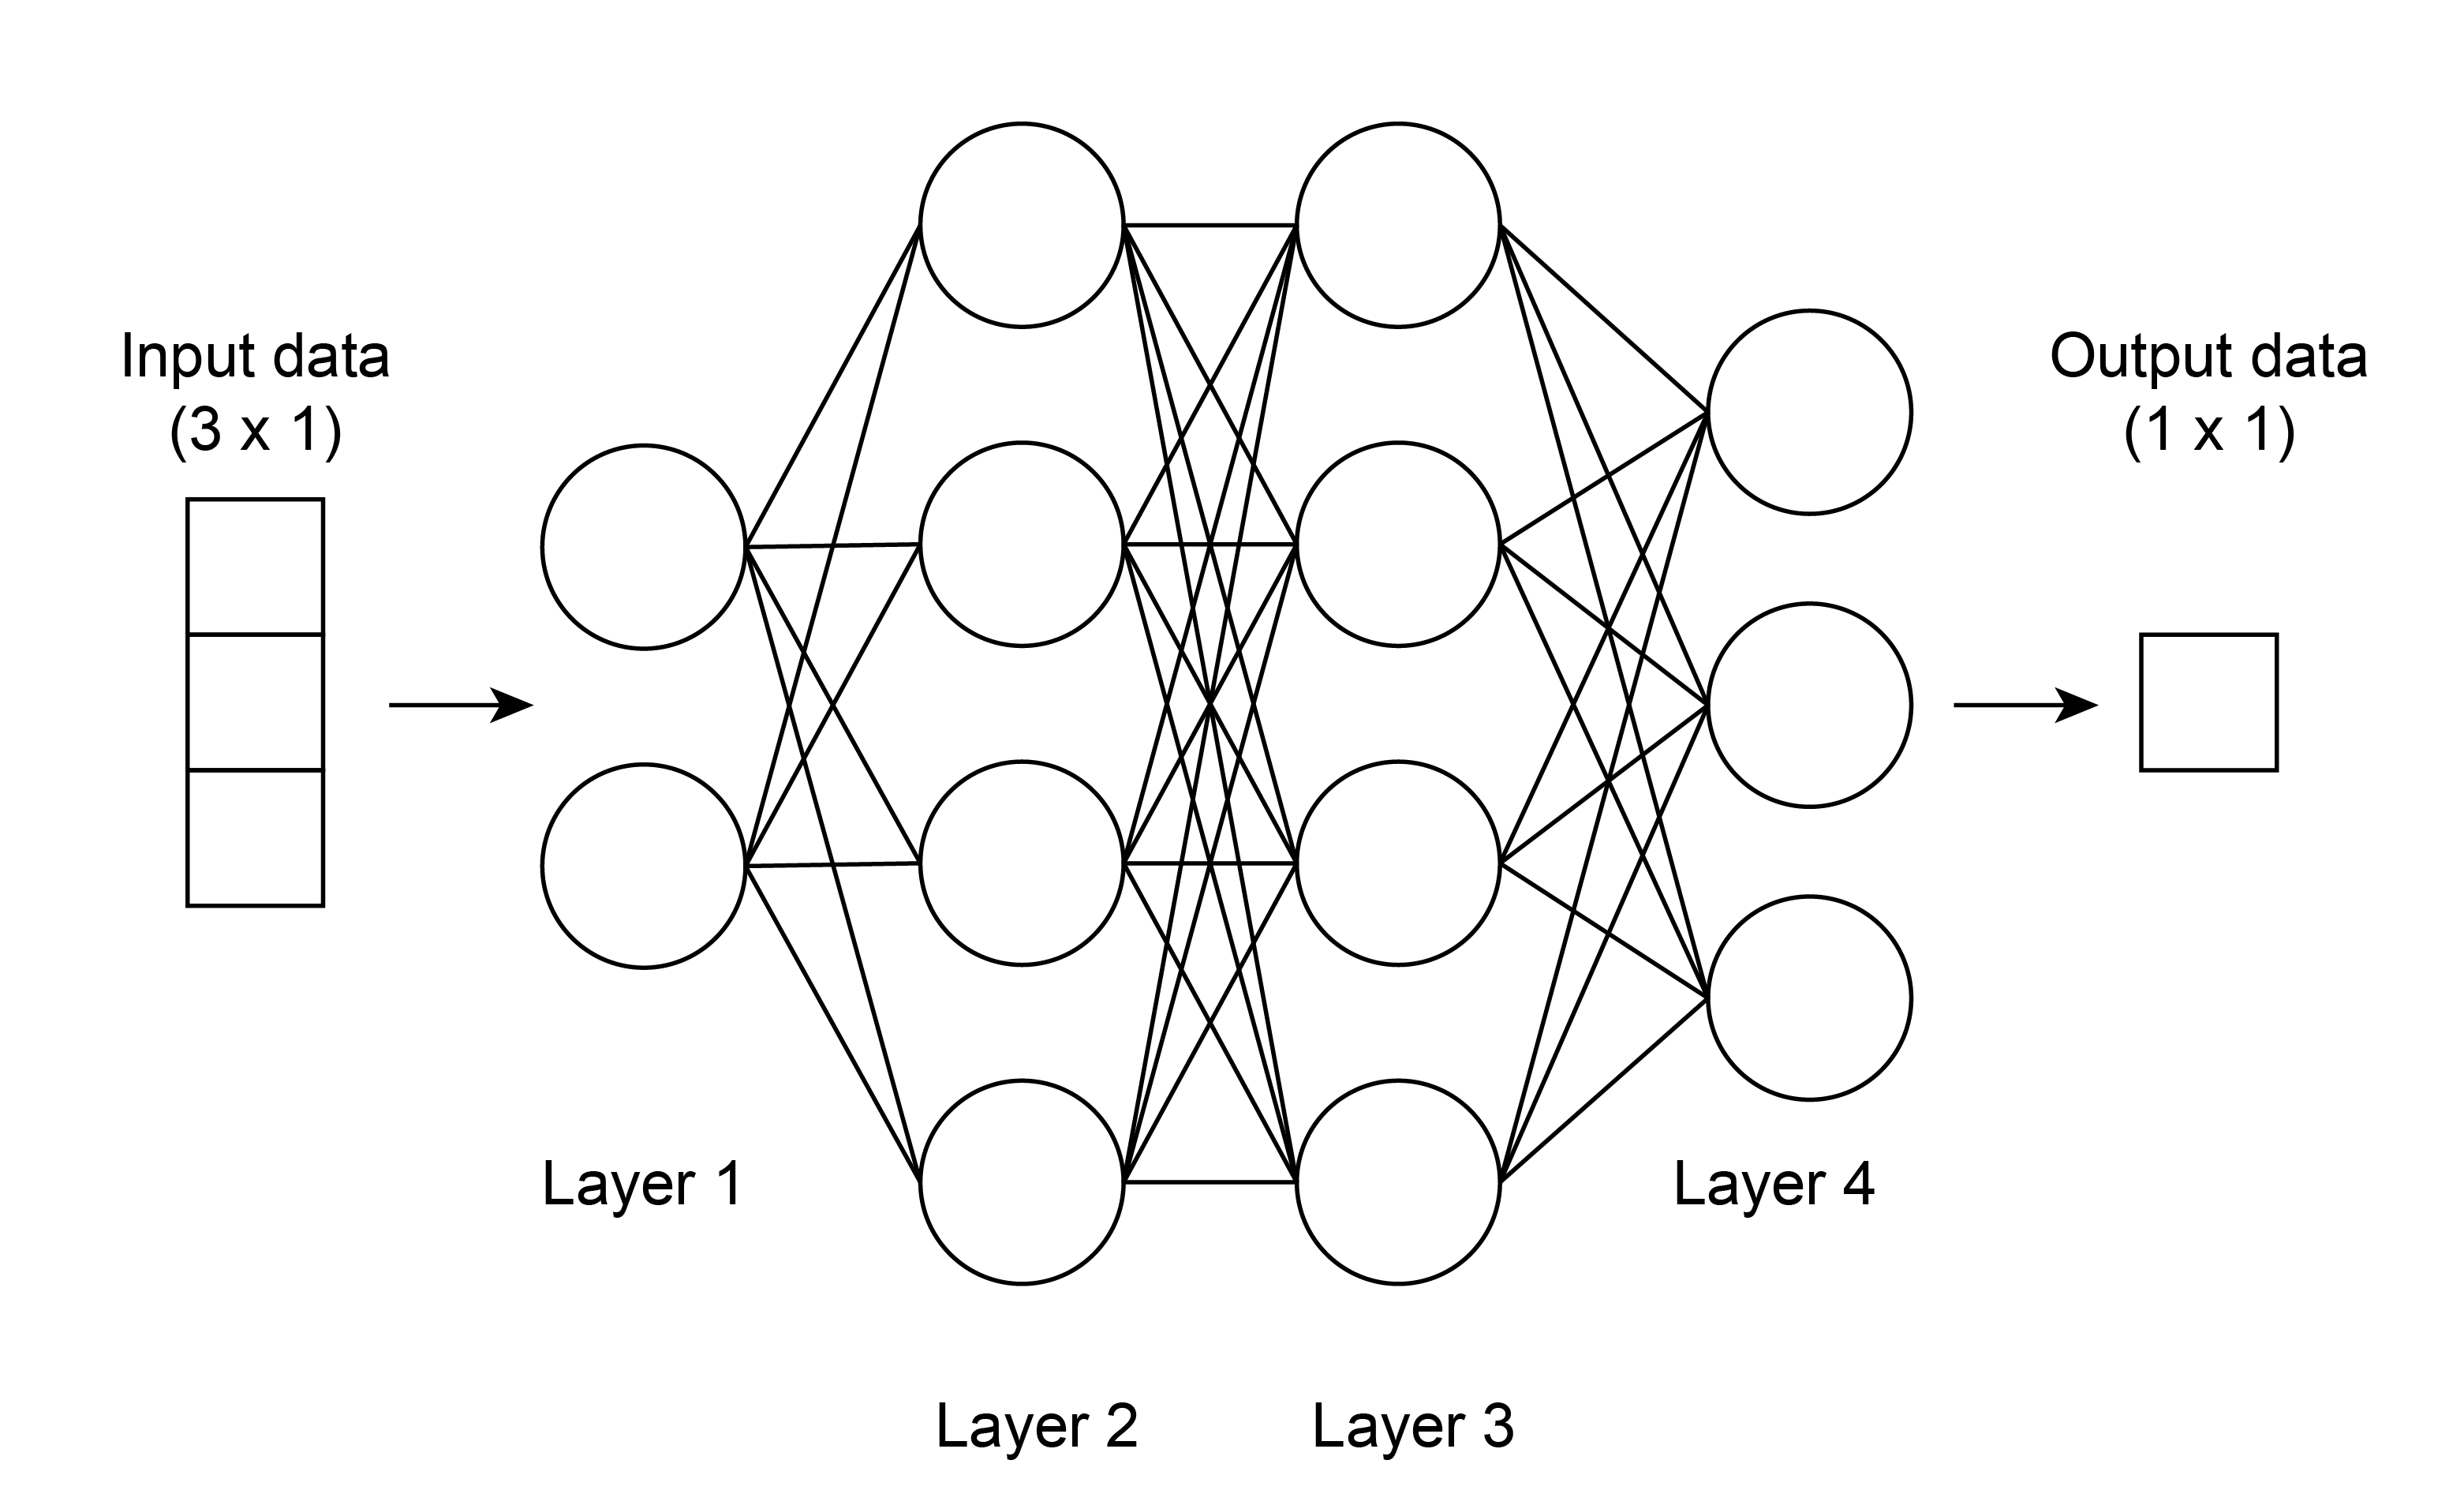

In [ ]:
import numpy as np

# Set a random seed for reproducibility
np.random.seed(0)

# Input vector (3x1)
x = np.random.randn(3, 1)

# Define the sigmoid activation function
def f(a):
    return 1 / (1 + np.exp(-a))

# Initialize weights and biases for each layer
# Layer1: 3 (input) -> 2 (nodes)
W1 = np.random.randn(2, 3)  # Shape: (2x3)
b1 = np.random.randn(2, 1)  # Shape: (2x1)

# Layer2: 2 -> 4
W2 = np.random.randn(4, 2)  # Shape: (4x2)
b2 = np.random.randn(4, 1)  # Shape: (4x1)

# Layer3: 4 -> 4
W3 = np.random.randn(4, 4)  # Shape: (4x4)
b3 = np.random.randn(4, 1)  # Shape: (4x1)

# Layer4: 4 -> 3
W4 = np.random.randn(3, 4)  # Shape: (3x4)
b4 = np.random.randn(3, 1)  # Shape: (3x1)

# Output Layer: 3 -> 1
W5 = np.random.randn(1, 3)  # Shape: (1x3)
b5 = np.random.randn(1, 1)  # Shape: (1x1)

# Forward propagation
h1 = f(np.dot(W1, x) + b1)   # First hidden layer (2x1)
h2 = f(np.dot(W2, h1) + b2)  # Second hidden layer (4x1)
h3 = f(np.dot(W3, h2) + b3)  # Third hidden layer (4x1)
h4 = f(np.dot(W4, h3) + b4)  # Fourth hidden layer (3x1)
out = f(np.dot(W5, h4) + b5) # Output layer (1x1)

# Print the output
print(out)


[[0.25185452]]


# Question 2
(50 points)

**Q2 Build CNN by stacking layers** (50 points):  \
Write a Convolutional Neural Network (at least 10-layer deep) to classify all 10 classes of CIFAR10. Use training samples to train your model, use validation samples to validate your model, and use testing samples to evaluate the performance of trained model.

You should: **1**. Train the model for at least 10 epochs. **2**. Report the AUROC of each type of images in the test set (eg. AUC of airplane = 0.98) and plot the ROC curves.

**Note:** 1. Building blocks of CNN layers in Keras/Tensorflow and pytorch are recommended for this question. 2. You may also import/load fullsize existing architectures (eg. Inception, Resnet, VGG) from APIs, but you will only get 50% of the points for this question. 3. Loading pretrained models of any kinds or copying from the demo will get 0 point for this question.

Epoch 1/10
625/625 [==============================] - 29s 14ms/step - loss: 1.5823 - accuracy: 0.4345 - val_loss: 1.2081 - val_accuracy: 0.5690
Epoch 2/10
625/625 [==============================] - 7s 12ms/step - loss: 1.1442 - accuracy: 0.5980 - val_loss: 0.9964 - val_accuracy: 0.6436
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.9489 - accuracy: 0.6710 - val_loss: 0.8517 - val_accuracy: 0.7030
Epoch 4/10
625/625 [==============================] - 7s 12ms/step - loss: 0.8114 - accuracy: 0.7222 - val_loss: 1.0115 - val_accuracy: 0.6424
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.7079 - accuracy: 0.7571 - val_loss: 0.7820 - val_accuracy: 0.7445
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6173 - accuracy: 0.7901 - val_loss: 0.6634 - val_accuracy: 0.7718
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5375 - accuracy: 0.8169 - val_loss: 0.7894 - val_accuracy: 0.749

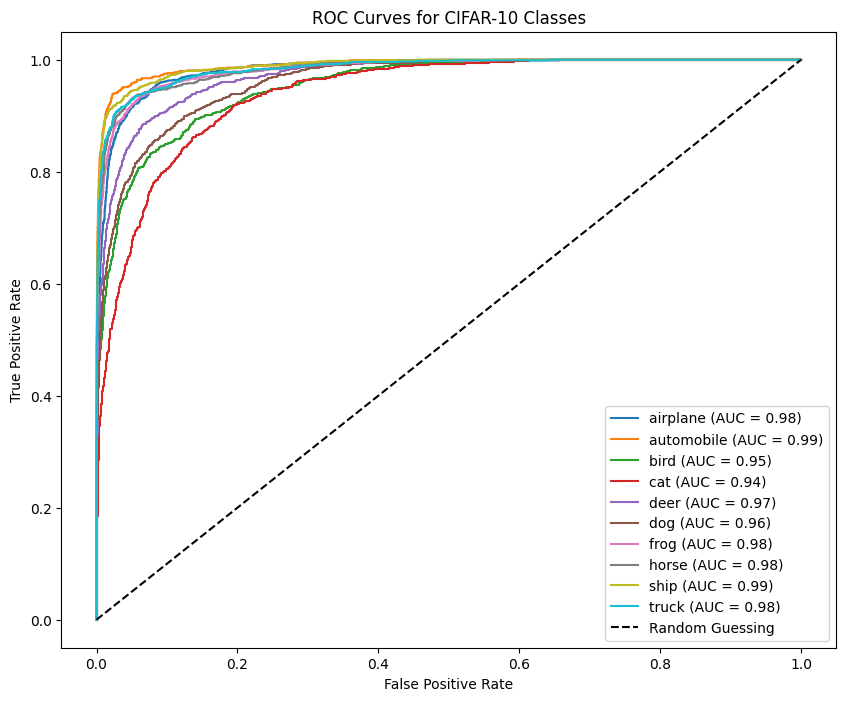

In [ ]:
#Fill in with your answer for Q2.

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split training set into training and validation sets
val_split = 0.2
val_size = int(len(x_train) * val_split)
x_val, y_val = x_train[:val_size], y_train[:val_size]
x_train, y_train = x_train[val_size:], y_train[val_size:]

# Build a 10-layer CNN
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding="same"),  # Output: (16, 16)

    # Block 2
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding="same"),  # Output: (8, 8)

    # Block 3
    layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2), padding="same"),  # Output: (4, 4)

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=64
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.2f}")

# Predict probabilities for the test set
y_pred = model.predict(x_test)

# Calculate AUROC and plot ROC curves for each class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
auroc_scores = {}

plt.figure(figsize=(10, 8))
for i, class_name in enumerate(class_names):
    # Compute ROC and AUC for each class
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    auc = roc_auc_score(y_test[:, i], y_pred[:, i])
    auroc_scores[class_name] = auc

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc:.2f})")

# Finalize ROC curve plot
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for CIFAR-10 Classes")
plt.legend()
plt.show()

# Print AUROC scores
for class_name, auc in auroc_scores.items():
    print(f"AUC of {class_name} = {auc:.2f}")


# Question 3
(30 points)

**Q3 Implement Grad-CAM** (30 points):  
Grad-CAM is a method for explaining the decisions of neural network based on the gradient of each predicted class wrt. the convolutional layer.

![](https://drive.google.com/uc?export=view&id=1grD1Jv76fG8UqS5dNVfhm7FsG6PRNExb)

[Grad-CAM paper](https://arxiv.org/abs/1610.02391)

We'll walk you through how to code Grad-CAM and provide an abundance of helper code. Ultimately, our goal here is to understand how one can track gradients in tensorflow. Replace the "None" with your code. For grading purposes, each is worth 3.33 points.

In [ ]:
#Instantiate a VGG16 model pretrained on imagenet.
import tensorflow as tf
model = tf.keras.applications.vgg16.VGG16()
model.summary() #Notice how model.summary() give a description of each layer, and how each are connected to one another.

AUC of airplane = 0.98
AUC of automobile = 0.99
AUC of bird = 0.95
AUC of cat = 0.94
AUC of deer = 0.97
AUC of dog = 0.96
AUC of frog = 0.98
AUC of horse = 0.98
AUC of ship = 0.99
AUC of truck = 0.98
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                           

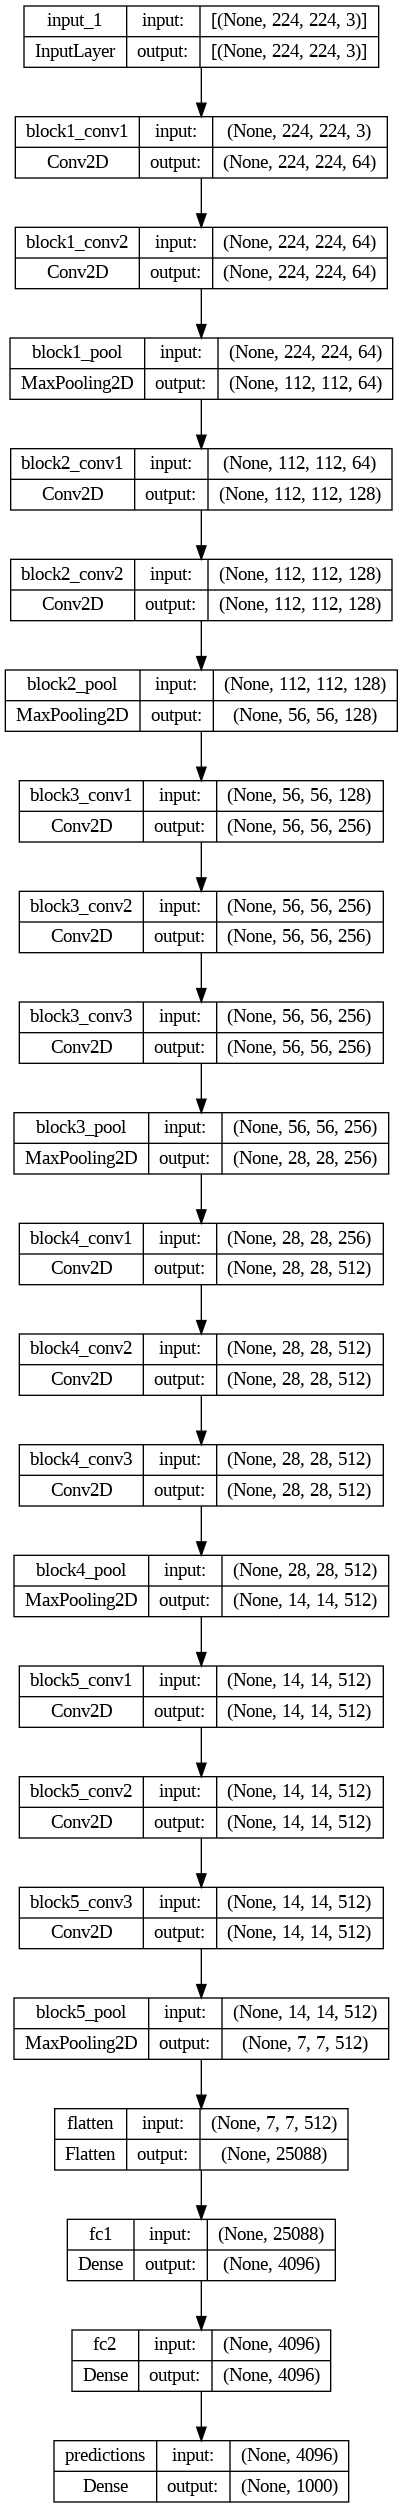

In [ ]:
##EXPLANATION OF FLOW OF THE DATA
!pip install tensorflow

from tensorflow.keras.utils import plot_model

# Save the model architecture as a PNG file
plot_model(model, to_file='vgg16_model.png', show_shapes=True, show_layer_names=True)


--2024-12-05 15:25:22--  https://raw.githubusercontent.com/keisen/tf-keras-vis/master/docs/examples/images/bear.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75354 (74K) [image/jpeg]
Saving to: ‘bear.jpg.1’

bear.jpg.1          100%[===================>]  73.59K  --.-KB/s    in 0.002s  

2024-12-05 15:25:23 (32.3 MB/s) - ‘bear.jpg.1’ saved [75354/75354]



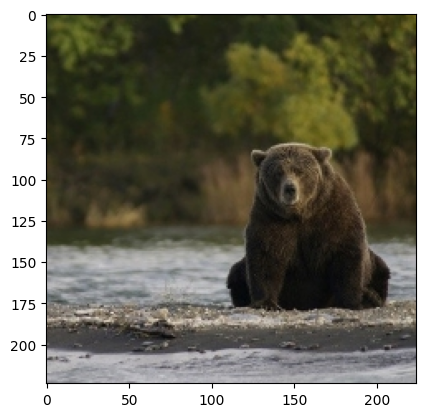

In [ ]:
#Now let's download a picture of a bear. This is one of the 1000 classes that VGG16 was pretrained on:
!wget https://raw.githubusercontent.com/keisen/tf-keras-vis/master/docs/examples/images/bear.jpg
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2

bear = Image.open('/content/bear.jpg')
bear = np.asarray(bear)
plt.imshow(bear)

A core portion of the Grad-CAM strategy is to calculate the gradients of the prediction class with respect to the values outputted from the last convolutional layer. Thankfully we won't have to calculate gradients by hand - we'll use a nifty tensorflow function to handle it. However, to make our lives easier, we should consider separating our VGG16 model into two individual components:


*   The first model will pass the bear image all the way up until the last convolutional layer.
*   The second model will pass the output of the last convolutional layer all the to the prediction output layer (the last layer).

Again we're just splitting the VGG16 model into two components - being able to track the output of the last convolutional layer will in turn allow us to calculate the gradients with respect to the layer of interest.



In [ ]:
!pip install tensorflow
from tensorflow.keras.applications import VGG16

In [ ]:

# Load the pre-trained VGG16 model
model = VGG16(weights="imagenet", include_top=True)

# Identify the last convolutional layer (e.g., "block5_conv3")
layer_name = 'conv'
last = [(idx, layer) for idx, layer in enumerate(model.layers) if (layer_name in layer.name)][-1]
last_conv_layer = last[1]
print(f"Last convolutional layer: {last_conv_layer.name}")

# Create a new model from input to the output of the last convolutional layer
last_conv_layer_model = tf.keras.Model(
    inputs=model.input,
    outputs=last_conv_layer.output
)

# Print the model summary to confirm the last layer is "block5_conv3"
print(last_conv_layer_model.summary())


Last convolutional layer: block5_conv3
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooli

In [ ]:
# Define the classifier input, matching the output shape of the last convolutional layer
classifier_input = tf.keras.Input(shape=last_conv_layer.output.shape[1:])

# Pass the input through the remaining layers of the original model
x = classifier_input
for i in range(last[0] + 1, len(model.layers)):
    x = model.layers[i](x)

# Build the classifier model
classifier_model = tf.keras.Model(inputs=classifier_input, outputs=x)

# Print the summary to validate the structure
print(classifier_model.summary())


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 14, 14, 512)]     0         
                                                                 
 block5_pool (MaxPooling2D)  (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 4096)              102764544 
                                                                 
 fc2 (Dense)                 (None, 4096)              16781312  
                                                                 
 predictions (Dense)         (None, 1000)              4097000   
                                                                 
Total params: 123642856 (471.66 MB)
Trainable params: 12364

In [ ]:
# Preprocess the image for VGG16
bear_image = cv2.resize(bear, (224, 224))  # Resize to 224x224 (VGG16 input size)
bear_image = tf.keras.applications.vgg16.preprocess_input(bear_image)  # Normalize
bear_image = np.expand_dims(bear_image, axis=0)  # Add batch dimension

# Now you can use bear_image in the gradient calculation
with tf.GradientTape() as tape:
    # Pass through the first model (last_conv_layer_model)
    last_conv_layer_output = last_conv_layer_model(bear_image)
    tape.watch(last_conv_layer_output)

    # Pass through the classifier model
    preds = classifier_model(last_conv_layer_output)

    # Identify the class with the highest prediction score
    top_pred_index = tf.argmax(preds[0])
    top_pred_prob = preds[:, top_pred_index]

# Calculate the gradients
grads = tape.gradient(top_pred_prob, last_conv_layer_output)

print(f"Gradients shape: {grads.shape}")

Gradients shape: (1, 14, 14, 512)


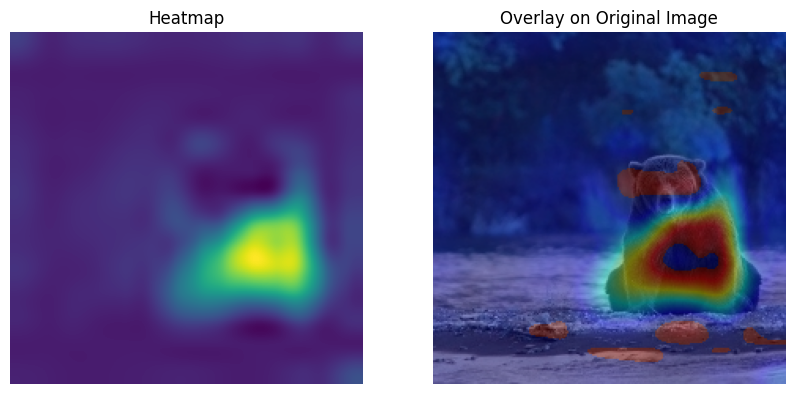

In [ ]:
# Pool gradients across spatial dimensions
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2)).numpy()

# Convert the last conv layer output to numpy
last_conv_layer_output_numpy = last_conv_layer_output.numpy()[0]

# Weight each feature map by the corresponding pooled gradient
for i in range(pooled_grads.shape[-1]):
    last_conv_layer_output_numpy[:, :, i] *= pooled_grads[i]

# Compute the mean of the weighted feature maps to generate the heatmap
heatmap = np.mean(last_conv_layer_output_numpy, axis=-1)

# Apply ReLU and normalize the heatmap
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Resize heatmap to the original image size
heatmap = cv2.resize(heatmap, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

# Overlay the heatmap on the original image
original_bear_image = cv2.resize(np.asarray(bear), (224, 224))
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# Superimpose the heatmap onto the original image with some transparency
superimposed_image = cv2.addWeighted(original_bear_image, 0.6, heatmap_colored, 0.4, 0)

# Display the heatmap and the overlay
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Heatmap")
plt.imshow(heatmap, cmap="viridis")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Overlay on Original Image")
plt.imshow(cv2.cvtColor(superimposed_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


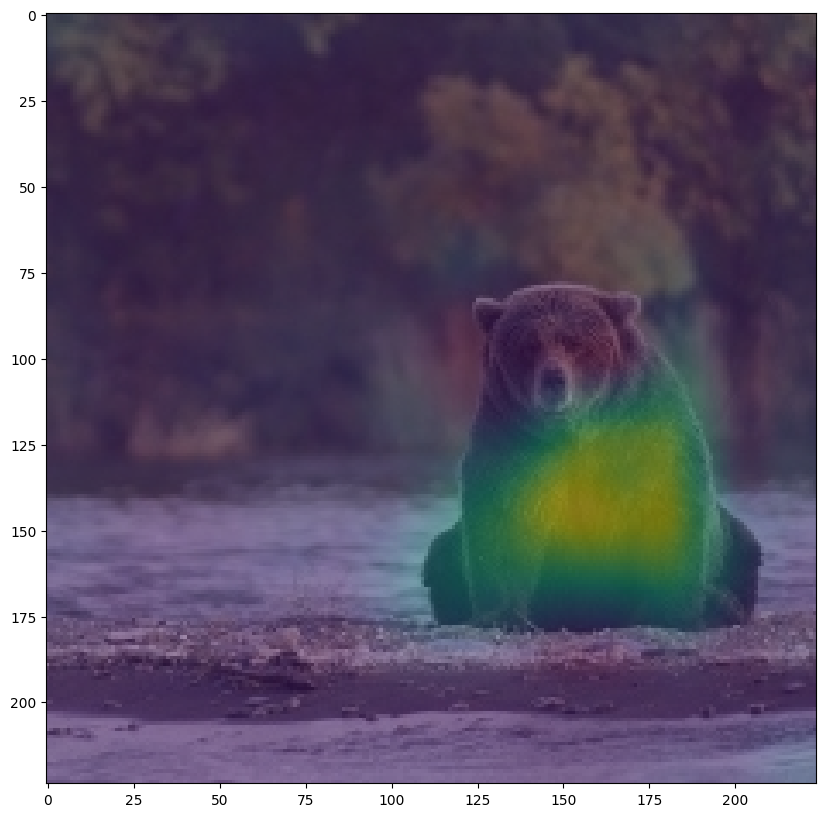

In [ ]:
#Now let's visualize that heatmap overlaid the original image:
from matplotlib import pyplot as plt

plt.figure(figsize = (10,10))
plt.imshow(bear)
plt.imshow(heatmap, alpha=0.5)

#If you coded this correctly, you should a heatmap with intense coloration around/within the bear.
#Here's a sample output we got when we ran through this code: https://drive.google.com/file/d/1PpEOMoP3y75Prq0CafEZb6LN5fLimy-a/view?usp=sharing

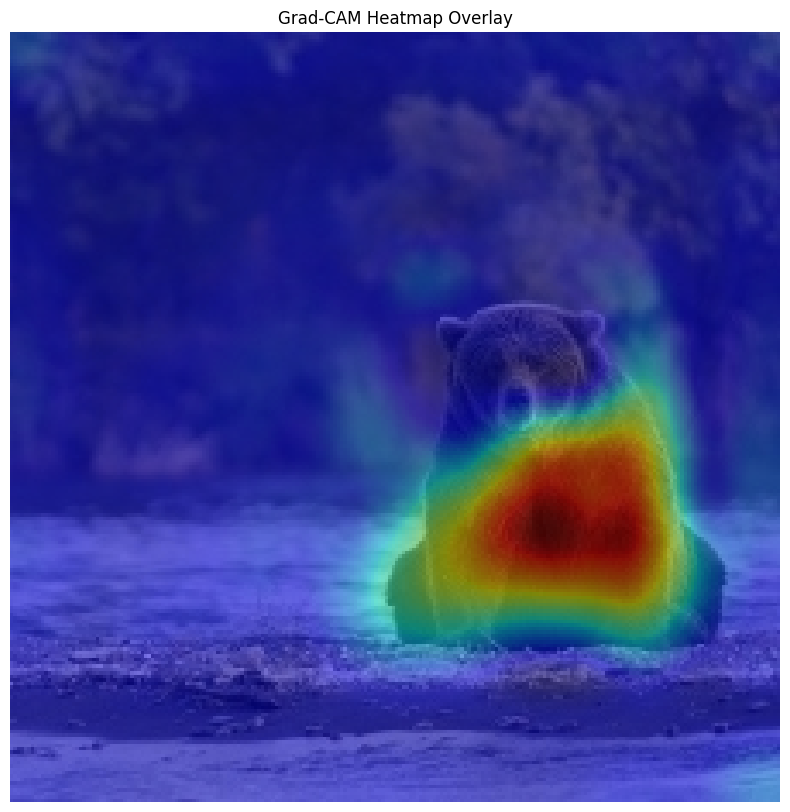

In [ ]:
from matplotlib import pyplot as plt

# Ensure the heatmap is resized to match the original image dimensions
heatmap_resized = cv2.resize(heatmap, (bear.shape[1], bear.shape[0]), interpolation=cv2.INTER_CUBIC)

# Overlay the heatmap on the original image with alpha blending
plt.figure(figsize=(10, 10))
plt.imshow(bear)  # Original image
plt.imshow(heatmap_resized, cmap='jet', alpha=0.5)  # Heatmap with transparency
plt.axis("off")
plt.title("Grad-CAM Heatmap Overlay")
plt.show()


# Question 4
(15 points extra credit)

In [ ]:
## There are a ton of helper functions in here. RUN THIS CELL before you start
## NO MODIFICATIONS are needed, but you're welcome to toy with it if interested

%%capture
from tensorflow.keras.datasets import cifar10
(train_set_images, train_set_labels), (test_set_images, test_set_labels) = cifar10.load_data()
validation_set_images = train_set_images[:10000]
validation_set_labels = train_set_labels[:10000]
train_set_images = train_set_images[10000:]
train_set_labels = train_set_labels[10000:]

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

# A pretrained initialModel to work with.
#!wget http://3.84.176.207:3838/submodel-32-32-64.zip
!wget -O /content/submodel-32-32-64.zip https://drive.google.com/uc?id=181VstIoX3dWg5j4HjCZx6dZ0sqHWPB7a
!unzip -o /content/submodel-32-32-64.zip

class Patches(layers.Layer):
    def __init__(self, patch_size, image_size):
        super().__init__()
        self.patch_size = patch_size
        self.image_size = image_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, int((self.image_size[0]/self.patch_size)**2), self.patch_size,self.patch_size,self.image_size[2]])
        return patches

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(256,256),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

class GlobalAvgPoolAcrossTime(layers.Layer):
    def __init__(self, **kwargs):
        super(GlobalAvgPoolAcrossTime, self).__init__(**kwargs)

    # (Batch_size, time, y, x, channels) -> (Batch_size, 1, y, x, channels)
    def call(self, inputs):
        return keras.backend.mean(inputs, axis=[-2,-3], keepdims=False)

class GlobalAvgPoolAcrossLast(layers.Layer):
    def __init__(self, **kwargs):
        super(GlobalAvgPoolAcrossLast, self).__init__(**kwargs)

    # (Batch_size, time, y, x, channels) -> (Batch_size, 1, y, x, channels)
    def call(self, inputs):
        return keras.backend.mean(inputs, axis=-1, keepdims=False)

data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(256,256),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)

def identity_block(X, f, filters, stage, block):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, stage, block, s=2):

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

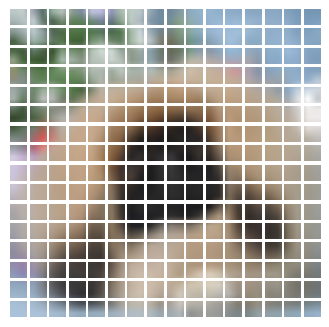

In [ ]:
from matplotlib import pyplot as plt

# We have provided a Patches class that "patches" images into a pre-defined grid.
# Here we see an example of this:

patch_size = 16 ## Feel free to play around with this value, it should be a multiple of 256, and <= 256.
resized_image = tf.image.resize(
    tf.convert_to_tensor([test_set_images[250]]), size=(256, 256)
)
patches = Patches(patch_size,resized_image[0].shape)(resized_image)
n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

**QUESTIONS:**

What is the pixel dimension of each patch? (1 point)

How many total patches are created with patch_size=16? (2 points)



In [ ]:
## Initialize a pre-trained ResNet50 stage2 portion (contains 1 convolutional
## block, and 2 identity blocks)with the patch input layer. This training
## process is very slow, so we recommend importing a pre-trained version we
## already created for you, but will include the code should you want to create
## it from scratch (and/or) if you want to change the patch size:

training = False
patch_size = 16

if training:
  input = tf.keras.layers.Input((train_set_images[0].shape))
  augmented = data_augmentation(input)
  patch = Patches(patch_size)(augmented)

  # Normally, the # of filters should be 64,64,256, but we've made it smaller
  # to run it more feasibly on Colab.
  X = convolutional_block(patch, f=3, filters=[32,32,64], stage=2, block='a', s=1)
  X = identity_block(X, 3, [32,32,64], stage=2, block='b')
  X = identity_block(X, 3, [32,32,64], stage=2, block='c')

  initialModel = tf.keras.Model(inputs=input,outputs=X)
else:
  initialModel = tf.keras.models.load_model('/content/submodel-32-32-64')
  # Since this portion of the model has already been trained, we do not want backpropagation to change these values
  initialModel.trainable=False


# This model starts with a (32,32,3) input, followed by a resize to
# (256,256,3) and data augmentation. The third layer creates the Patches.
# Since we want 16x16 patches, each 256x256x3 becomes divided into 256 16x16 patches
# Each patch is then fed forward through the ResNet50 stage2 model to extract
# relevant imaging signals. We can also see that the last layer outputs a tensor
# of size (256,64), where the 256 represents the 256 patches, and 64 represents
# the compressed latent vectors.
initialModel.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 256, 256, 3)          7         ['input_1[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches (Patches)           (None, 256, 16, 16, 3)       0         ['data_augmentation[0][0]']   
                                                                                                  
 res2a_branch2a (Conv2D)     (None, 256, 16, 16, 32)      128       ['patches[0][0]']       

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from keras.initializers import glorot_uniform

# Patches layer to divide an image into patches of size patch_size
class Patches(layers.Layer):
    def __init__(self, patch_size, image_size):
        super().__init__()
        self.patch_size = patch_size
        self.image_size = image_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, int((self.image_size[0]/self.patch_size)**2), self.patch_size, self.patch_size, self.image_size[2]])
        return patches

# Convolutional block with skip connection (used in ResNet)
def convolutional_block(X, f, filters, stage, block, s=2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

# Identity block (used in ResNet for feature extraction)
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])  # Skip connection
    X = Activation('relu')(X)

    return X

# Model definition with patch input layer and ResNet blocks
training = False
patch_size = 16

if training:
    input = tf.keras.layers.Input((32, 32, 3))
    augmented = data_augmentation(input)  # Apply data augmentation
    patch = Patches(patch_size, input.shape)(augmented)

    # Normally, the number of filters should be [64, 64, 256], but using smaller values for simplicity
    X = convolutional_block(patch, f=3, filters=[32, 32, 64], stage=2, block='a', s=1)
    X = identity_block(X, 3, [32, 32, 64], stage=2, block='b')
    X = identity_block(X, 3, [32, 32, 64], stage=2, block='c')

    initialModel = tf.keras.Model(inputs=input, outputs=X)
else:
    initialModel = tf.keras.models.load_model('/content/submodel-32-32-64')
    initialModel.trainable = False  # Freeze the weights of the pretrained model

# Show the model summary
initialModel.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 256, 256, 3)          7         ['input_1[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches (Patches)           (None, 256, 16, 16, 3)       0         ['data_augmentation[0][0]']   
                                                                                                  
 res2a_branch2a (Conv2D)     (None, 256, 16, 16, 32)      128       ['patches[0][0]']       

For ALL of the below code, fill in "None" with the correct values. All "None" values should be replaced with something. 2 points each!

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, MultiHeadAttention, Dense, GlobalAveragePooling1D

# Extract the output from the initialModel
pool = initialModel.output

# Add positional embedding
patches = patch_size * patch_size  # Number of patches in the image

position_embedding = tf.keras.layers.Embedding(input_dim=patches, output_dim=64)
positions = tf.range(start=0, limit=patches, delta=1)  # Generate positional indices
encoded = pool + position_embedding(positions)  # Add positional embedding

# Pass this into attention
# We are using self-attention, so Q = K = V
attention = MultiHeadAttention(num_heads=1, key_dim=64)(encoded, encoded, encoded)

# The output of attention will be [batch_size, num_patches, embedding_dim]. Average over the last axis
pool = GlobalAvgPoolAcrossLast()(attention)

# Connect to a dense layer
pred = Dense(units=10, activation='softmax')(pool)  # Adjust the number of units based on your classification task

# Final model
finalModel = tf.keras.Model(inputs=initialModel.input, outputs=pred)

# Show the model summary
finalModel.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 256, 256, 3)          7         ['input_1[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches (Patches)           (None, 256, 16, 16, 3)       0         ['data_augmentation[0][0]']   
                                                                                                  
 res2a_branch2a (Conv2D)     (None, 256, 16, 16, 32)      128       ['patches[0][0]']       

In [ ]:
# Now we train!
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
finalModel.compile(
        optimizer=optimizer,
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )
finalModel.fit(x=train_set_images,y=train_set_labels,batch_size=32,epochs=2,validation_data=(validation_set_images,validation_set_labels))

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1250/1250 [==============================] - 467s 367ms/step - loss: 1.9248 - accuracy: 0.2762 - top-5-accuracy: 0.8054 - val_loss: 1.8588 - val_accuracy: 0.3065 - val_top-5-accuracy: 0.8339
Epoch 2/2
1250/1250 [==============================] - 492s 394ms/step - loss: 1.8642 - accuracy: 0.3124 - top-5-accuracy: 0.8307 - val_loss: 1.8388 - val_accuracy: 0.3246 - val_top-5-accuracy: 0.8365


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, MultiHeadAttention, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model

# Extract the output from the initialModel
pool = initialModel.output

# Define patch size
patch_size = 16  # or your desired patch size

# Add positional embedding
patches = patch_size * patch_size  # Number of patches in the image

# Create the positional embedding layer
position_embedding = tf.keras.layers.Embedding(input_dim=patches, output_dim=64)
positions = tf.range(start=0, limit=patches, delta=1)  # Generate positional indices
positions = tf.expand_dims(positions, axis=0)  # Add batch dimension
encoded = pool + position_embedding(positions)  # Add positional embedding

# Pass this into attention
# We are using self-attention, so Q = K = V
attention = MultiHeadAttention(num_heads=1, key_dim=64)(encoded, encoded, encoded)

# The output of attention will be [batch_size, num_patches, embedding_dim]. Average over the last axis
attention_output = GlobalAveragePooling1D()(attention)

# Connect to a dense layer
pred = Dense(units=10, activation='softmax')(attention_output)  # Adjust the number of units based on your classification task

# Final model
finalModel = Model(inputs=initialModel.input, outputs=pred)

# Show the model summary
finalModel.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 data_augmentation (Sequent  (None, 256, 256, 3)          7         ['input_1[0][0]']             
 ial)                                                                                             
                                                                                                  
 patches (Patches)           (None, 256, 16, 16, 3)       0         ['data_augmentation[0][0]']   
                                                                                                  
 res2a_branch2a (Conv2D)     (None, 256, 16, 16, 32)      128       ['patches[0][0]']       

1/1 [==============================] - 1s 850ms/step
Shape of attention outputs: (1, 256, 64)


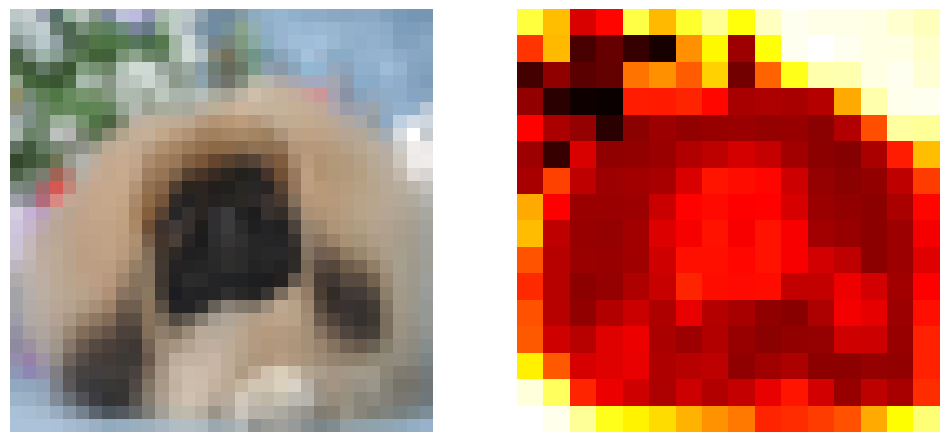

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a new model to output the attention weights from the MultiHeadAttention layer
model2 = tf.keras.Model(inputs=finalModel.input, outputs=finalModel.layers[-3].output)  # Assuming attention is the 3rd-to-last layer

# Predict the outputs (attention weights)
outputs = model2.predict(np.asarray([test_set_images[250]]))

# Check the shape of the attention outputs
print("Shape of attention outputs:", outputs.shape)

# Since the attention output is (batch_size, num_patches, embedding_dim)
# We'll compute the median across the embedding dimension (axis=-1)
attention_weights = np.median(outputs[0], axis=-1)  # Shape: (num_patches, )

# Reshape the attention weights for visualization (patch_size x patch_size)
attention_weights = attention_weights.reshape(patch_size, patch_size)

# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
ax[0].imshow(test_set_images[250])
ax[0].axis('off')  # Hide axes for the image

# Display the attention weights (normalized or median)
ax[1].imshow(attention_weights, cmap='hot')
ax[1].axis('off')  # Hide axes for the heatmap

plt.show()
